In [ ]:
! pip install pyarrow

## Import Packages and Data

In [ ]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get Borough info
zone_data = pd.read_csv('taxi_zone_lookup.csv')
zone_data

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NV,NaN


In [ ]:
# convert parquet format to DataFrame
trips_1 = pq.read_table('fhvhv_tripdata_2021-01.parquet')
trips_1 = trips_1.to_pandas()
# select certain columns
trips_1 = trips_1[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
# select Uber only
uber_1 = trips_1[trips_1['hvfhs_license_num']=='HV0003']
# reset index
uber_1 = uber_1.reset_index(drop=True)
uber_1

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:33:44,2021-01-01 00:49:07,923,5.26,22.28,1.98,0.00,230,166
1,HV0003,2021-01-01 00:55:19,2021-01-01 01:18:21,1382,3.65,18.36,1.63,0.00,152,167
2,HV0003,2021-01-01 00:23:56,2021-01-01 00:38:05,849,3.51,14.05,1.25,0.94,233,142
3,HV0003,2021-01-01 00:42:51,2021-01-01 00:45:50,179,0.74,7.91,0.70,0.00,142,143
4,HV0003,2021-01-01 00:48:14,2021-01-01 01:08:42,1228,9.20,27.11,2.41,0.00,143,78
...,...,...,...,...,...,...,...,...,...,...
8704123,HV0003,2021-01-31 23:25:40,2021-01-31 23:40:10,870,2.29,16.78,1.49,0.00,89,71
8704124,HV0003,2021-01-31 23:29:31,2021-01-31 23:47:44,1093,4.10,17.19,1.53,2.00,182,167
8704125,HV0003,2021-01-31 23:49:32,2021-02-01 00:04:36,904,2.40,19.53,1.73,0.00,167,169
8704126,HV0003,2021-01-31 23:09:29,2021-01-31 23:27:46,1097,3.60,19.87,1.76,0.00,188,37


In [ ]:
trips_2 = pq.read_table('fhvhv_tripdata_2021-02.parquet')
trips_2 = trips_2.to_pandas()
trips_2 = trips_2[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_2 = trips_2[trips_2['hvfhs_license_num']=='HV0003']
uber_2 = uber_2.reset_index(drop=True)
uber_2

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-02-01 00:10:40,2021-02-01 00:21:09,629,2.06,17.14,1.52,0.0,35,39
1,HV0003,2021-02-01 00:27:23,2021-02-01 00:44:01,998,3.15,32.11,2.85,0.0,39,35
2,HV0003,2021-02-01 00:08:42,2021-02-01 00:17:57,555,2.62,15.56,1.38,0.0,126,250
3,HV0003,2021-02-01 00:26:02,2021-02-01 00:42:51,1009,6.89,19.98,1.77,0.0,208,243
4,HV0003,2021-02-01 00:45:50,2021-02-01 01:02:50,1020,4.26,42.36,3.76,0.0,243,220
...,...,...,...,...,...,...,...,...,...,...
8290753,HV0003,2021-02-28 23:52:56,2021-03-01 00:26:18,2002,22.62,44.06,3.91,0.0,21,92
8290754,HV0003,2021-02-28 23:14:28,2021-02-28 23:37:55,1407,8.61,26.21,2.33,0.0,148,228
8290755,HV0003,2021-02-28 23:42:04,2021-03-01 00:05:06,1382,5.14,21.35,1.89,0.0,228,89
8290756,HV0003,2021-02-28 23:08:23,2021-02-28 23:12:34,251,1.10,9.49,0.84,0.0,10,205


In [ ]:
trips_3 = pq.read_table('fhvhv_tripdata_2021-03.parquet')
trips_3 = trips_3.to_pandas()
trips_3 = trips_3[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_3 = trips_3[trips_3['hvfhs_license_num']=='HV0003']
uber_3 = uber_3.reset_index(drop=True)
uber_3

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-03-01 00:07:07,2021-03-01 00:13:56,409,1.35,7.91,0.70,0.0,56,82
1,HV0003,2021-03-01 00:17:00,2021-03-01 00:38:08,1268,7.03,16.52,2.06,0.0,82,100
2,HV0003,2021-03-01 00:51:29,2021-03-01 01:06:02,873,3.53,27.06,2.40,6.6,237,249
3,HV0003,2021-03-01 00:07:16,2021-03-01 00:12:35,319,1.04,7.12,0.63,0.0,136,235
4,HV0003,2021-03-01 00:19:09,2021-03-01 00:27:52,523,1.76,9.22,0.82,0.0,235,153
...,...,...,...,...,...,...,...,...,...,...
10173371,HV0003,2021-03-31 23:33:05,2021-03-31 23:38:17,312,1.00,8.70,0.77,0.0,220,241
10173372,HV0003,2021-03-31 23:41:53,2021-03-31 23:57:50,957,6.19,25.01,2.22,2.0,136,74
10173373,HV0003,2021-03-31 23:06:29,2021-03-31 23:20:13,824,3.49,24.21,2.69,0.0,161,145
10173374,HV0003,2021-03-31 23:38:44,2021-03-31 23:44:04,320,1.54,9.49,0.84,0.0,233,107


In [ ]:
trips_4 = pq.read_table('fhvhv_tripdata_2021-04.parquet')
trips_4 = trips_4.to_pandas()
trips_4 = trips_4[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips']]
uber_4 = trips_4[trips_4['hvfhs_license_num']=='HV0003']
uber_4 = uber_4.reset_index(drop=True)
uber_4

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips
0,HV0003,2021-04-01 00:10:56,2021-04-01 00:26:15,919,3.22,15.32,1.36,0.00
1,HV0003,2021-04-01 00:32:36,2021-04-01 00:42:04,568,5.77,9.94,0.88,0.00
2,HV0003,2021-04-01 00:47:49,2021-04-01 00:56:14,505,1.23,7.91,0.70,0.00
3,HV0003,2021-04-01 00:12:39,2021-04-01 00:22:15,576,5.05,16.93,1.50,0.00
4,HV0003,2021-04-01 00:26:47,2021-04-01 00:51:53,1506,18.86,30.72,2.73,0.00
...,...,...,...,...,...,...,...,...
10238377,HV0003,2021-04-30 23:51:26,2021-05-01 00:01:12,586,4.25,41.15,3.65,0.00
10238378,HV0003,2021-04-30 23:08:35,2021-04-30 23:18:28,593,1.93,20.63,1.83,6.45
10238379,HV0003,2021-04-30 23:32:01,2021-04-30 23:37:58,357,1.03,24.79,2.20,0.00
10238380,HV0003,2021-04-30 23:11:32,2021-04-30 23:21:07,575,1.91,13.08,1.16,3.00


In [ ]:
trips_5 = pq.read_table('fhvhv_tripdata_2021-05.parquet')
trips_5 = trips_5.to_pandas()
trips_5 = trips_5[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_5 = trips_5[trips_5['hvfhs_license_num']=='HV0003']
uber_5 = uber_5.reset_index(drop=True)
uber_5

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-05-01 00:07:26,2021-05-01 00:14:44,438,1.22,20.44,1.81,0.0,246,234
1,HV0003,2021-05-01 00:17:47,2021-05-01 00:31:24,817,4.59,62.47,5.58,0.0,113,238
2,HV0003,2021-05-01 00:47:11,2021-05-01 00:55:24,493,1.37,7.91,0.70,0.0,236,262
3,HV0003,2021-05-01 00:59:29,2021-05-01 01:12:06,757,2.99,14.12,1.25,0.0,262,143
4,HV0003,2021-05-01 00:16:21,2021-05-01 00:59:12,2571,31.16,129.90,0.00,0.0,263,265
...,...,...,...,...,...,...,...,...,...,...
10808410,HV0003,2021-05-31 23:41:24,2021-05-31 23:51:15,591,2.74,16.98,1.51,0.0,147,74
10808411,HV0003,2021-05-31 23:56:34,2021-06-01 00:08:34,720,1.92,14.73,1.31,0.0,74,42
10808412,HV0003,2021-05-31 23:35:27,2021-05-31 23:45:59,632,1.80,20.99,1.86,0.0,130,10
10808413,HV0003,2021-05-31 23:52:48,2021-05-31 23:57:33,285,1.46,12.65,1.12,0.0,218,10


In [ ]:
trips_6 = pq.read_table('fhvhv_tripdata_2021-06.parquet')
trips_6 = trips_6.to_pandas()
trips_6 = trips_6[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_6 = trips_6[trips_6['hvfhs_license_num']=='HV0003']
uber_6 = uber_6.reset_index(drop=True)
uber_6

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-06-01 00:02:41,2021-06-01 00:07:46,305,1.00,8.13,0.72,0.0,174,18
1,HV0003,2021-06-01 00:16:16,2021-06-01 00:21:14,298,1.39,9.49,0.84,0.0,32,254
2,HV0003,2021-06-01 00:27:01,2021-06-01 00:42:11,910,5.51,19.61,1.74,0.0,240,127
3,HV0003,2021-06-01 00:46:08,2021-06-01 00:53:45,457,1.50,8.50,0.75,1.0,127,235
4,HV0003,2021-06-01 00:48:06,2021-06-01 01:04:10,964,0.96,44.34,3.94,0.0,209,45
...,...,...,...,...,...,...,...,...,...,...
10747385,HV0003,2021-06-30 23:52:15,2021-07-01 00:08:41,986,2.86,13.19,0.00,0.0,72,39
10747386,HV0003,2021-06-30 23:30:49,2021-06-30 23:46:26,937,2.64,19.44,1.73,0.0,162,249
10747387,HV0003,2021-06-30 23:52:25,2021-07-01 00:16:00,1415,5.25,29.88,2.65,0.0,68,25
10747388,HV0003,2021-06-30 23:09:30,2021-06-30 23:24:21,891,5.84,32.09,2.85,0.0,261,137


In [ ]:
trips_7 = pq.read_table('fhvhv_tripdata_2021-07.parquet')
trips_7 = trips_7.to_pandas()
trips_7 = trips_7[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_7 = trips_7[trips_7['hvfhs_license_num']=='HV0003']
uber_7 = uber_7.reset_index(drop=True)
uber_7

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-07-01 00:10:28,2021-07-01 00:17:53,445,1.29,7.91,0.70,0.00,82,157
1,HV0003,2021-07-01 00:30:11,2021-07-01 00:36:37,386,1.39,7.91,0.70,5.00,82,95
2,HV0003,2021-07-01 00:36:42,2021-07-01 00:46:03,561,2.90,15.77,1.40,4.07,68,239
3,HV0003,2021-07-01 00:50:59,2021-07-01 01:05:03,844,5.10,19.91,1.77,0.00,239,224
4,HV0003,2021-07-01 00:14:45,2021-07-01 00:31:36,1011,3.73,18.72,1.66,0.00,188,39
...,...,...,...,...,...,...,...,...,...,...
10704361,HV0003,2021-07-31 23:16:46,2021-07-31 23:33:10,984,2.94,23.97,2.13,0.00,164,125
10704362,HV0003,2021-07-31 23:39:35,2021-07-31 23:50:08,633,1.59,22.60,2.01,0.00,211,234
10704363,HV0003,2021-07-31 23:57:07,2021-08-01 00:14:04,1017,2.21,17.25,1.53,0.00,164,163
10704364,HV0003,2021-07-31 23:12:51,2021-07-31 23:20:50,479,1.83,33.20,1.72,0.00,161,263


In [ ]:
trips_8 = pq.read_table('fhvhv_tripdata_2021-08.parquet')
trips_8 = trips_8.to_pandas()
trips_8 = trips_8[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_8 = trips_8[trips_8['hvfhs_license_num']=='HV0003']
uber_8 = uber_8.reset_index(drop=True)
uber_8

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-08-01 00:26:41,2021-08-01 00:48:17,1296,6.51,35.43,3.14,0.0,76,197
1,HV0003,2021-08-01 00:54:24,2021-08-01 01:12:02,1058,10.68,32.19,2.86,0.0,102,7
2,HV0003,2021-08-01 00:14:35,2021-08-01 00:21:19,404,0.80,14.71,1.31,0.0,211,79
3,HV0003,2021-08-01 00:33:33,2021-08-01 00:47:33,840,4.32,26.63,2.36,3.0,79,13
4,HV0003,2021-08-01 00:01:58,2021-08-01 00:15:22,804,2.67,17.93,1.59,0.0,258,124
...,...,...,...,...,...,...,...,...,...,...
10196742,HV0003,2021-08-31 23:21:09,2021-08-31 23:38:02,1013,4.43,44.20,3.92,0.0,88,255
10196743,HV0003,2021-08-31 23:40:17,2021-08-31 23:44:05,228,0.56,15.57,1.38,4.0,256,255
10196744,HV0003,2021-08-31 23:54:00,2021-09-01 00:11:30,1050,3.06,29.17,2.59,0.0,255,49
10196745,HV0003,2021-08-31 23:23:43,2021-08-31 23:39:47,964,5.45,34.92,3.10,0.0,162,87


In [ ]:
trips_9 = pq.read_table('fhvhv_tripdata_2021-09.parquet')
trips_9 = trips_9.to_pandas()
trips_9 = trips_9[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_9 = trips_9[trips_9['hvfhs_license_num']=='HV0003']
uber_9 = uber_9.reset_index(drop=True)
uber_9

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-09-01 00:31:14,2021-09-01 01:08:25,2231,14.93,89.95,7.98,0.0,211,108
1,HV0003,2021-09-01 00:07:45,2021-09-01 00:13:47,362,1.19,8.72,0.77,0.0,157,198
2,HV0003,2021-09-01 00:28:25,2021-09-01 00:49:38,1273,13.08,48.69,4.32,0.0,80,191
3,HV0003,2021-09-01 00:22:52,2021-09-01 00:29:57,425,1.49,18.84,1.67,0.0,161,141
4,HV0003,2021-09-01 00:34:54,2021-09-01 00:37:08,134,0.61,11.61,1.03,0.0,236,141
...,...,...,...,...,...,...,...,...,...,...
10557437,HV0003,2021-09-30 23:01:20,2021-09-30 23:23:39,1339,5.28,23.16,2.06,0.0,237,255
10557438,HV0003,2021-09-30 23:27:49,2021-09-30 23:45:41,1072,2.76,13.67,1.21,0.0,255,79
10557439,HV0003,2021-09-30 23:51:31,2021-10-01 00:16:48,1517,5.19,32.63,2.90,0.0,4,36
10557440,HV0003,2021-09-30 23:27:51,2021-09-30 23:51:21,1410,10.30,34.71,3.08,0.0,231,74


In [ ]:
trips_10 = pq.read_table('fhvhv_tripdata_2021-10.parquet')
trips_10 = trips_10.to_pandas()
trips_10 = trips_10[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_10 = trips_10[trips_10['hvfhs_license_num']=='HV0003']
uber_10 = uber_10.reset_index(drop=True)
uber_10

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-10-01 00:33:31,2021-10-01 01:07:51,2060,12.79,35.49,3.15,7.47,68,85
1,HV0003,2021-10-01 00:38:49,2021-10-01 00:49:23,634,1.00,9.92,0.88,0.00,97,65
2,HV0003,2021-10-01 00:23:25,2021-10-01 00:32:29,544,1.94,26.91,2.39,0.00,68,137
3,HV0003,2021-10-01 00:38:26,2021-10-01 01:18:00,2374,11.47,48.59,0.00,0.00,164,265
4,HV0003,2021-10-01 00:07:27,2021-10-01 00:18:23,656,2.63,26.47,2.35,0.00,249,230
...,...,...,...,...,...,...,...,...,...,...
12086384,HV0003,2021-10-31 23:16:19,2021-10-31 23:45:35,1756,8.25,29.64,2.63,0.00,230,70
12086385,HV0003,2021-10-31 23:53:26,2021-11-01 00:17:55,1469,6.84,40.68,3.83,0.00,138,43
12086386,HV0003,2021-10-31 23:25:45,2021-10-31 23:40:01,856,3.05,23.53,2.09,0.00,79,256
12086387,HV0003,2021-10-31 23:55:47,2021-11-01 00:05:22,575,2.94,23.69,2.10,0.00,148,137


In [ ]:
trips_11 = pq.read_table('fhvhv_tripdata_2021-11.parquet')
trips_11 = trips_11.to_pandas()
trips_11 = trips_11[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_11 = trips_11[trips_11['hvfhs_license_num']=='HV0003']
uber_11 = uber_11.reset_index(drop=True)
uber_11

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-11-01 00:00:52,2021-11-01 00:07:05,373,1.11,7.91,0.70,0.0,225,37
1,HV0003,2021-11-01 00:12:43,2021-11-01 00:33:16,1233,5.52,25.73,2.28,0.0,36,124
2,HV0003,2021-11-01 00:41:42,2021-11-01 00:48:36,414,1.62,7.91,0.70,0.0,132,216
3,HV0003,2021-11-01 00:55:56,2021-11-01 01:04:54,538,2.54,11.17,0.99,0.0,216,258
4,HV0003,2021-11-01 00:15:05,2021-11-01 00:19:32,267,1.16,23.74,2.11,0.0,211,87
...,...,...,...,...,...,...,...,...,...,...
11819592,HV0003,2021-11-30 23:57:20,2021-12-01 00:07:19,599,1.98,11.10,0.99,0.0,227,14
11819593,HV0003,2021-11-30 23:03:16,2021-11-30 23:11:17,481,1.53,17.85,1.58,3.0,65,49
11819594,HV0003,2021-11-30 23:33:11,2021-11-30 23:47:37,866,3.38,17.24,1.53,0.0,181,85
11819595,HV0003,2021-11-30 23:31:28,2021-11-30 23:45:57,869,3.52,20.61,1.83,0.0,114,80


In [ ]:
trips_12 = pq.read_table('fhvhv_tripdata_2021-12.parquet')
trips_12 = trips_12.to_pandas()
trips_12 = trips_12[['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime', 'trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'tips', 'PULocationID', 'DOLocationID']]
uber_12 = trips_12[trips_12['hvfhs_license_num']=='HV0003']
uber_12 = uber_12.reset_index(drop=True)
uber_12

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-12-01 00:09:16,2021-12-01 00:58:03,2928,17.54,72.32,6.42,0.00,164,265
1,HV0003,2021-12-01 00:06:05,2021-12-01 00:19:05,780,2.39,13.27,1.18,0.00,80,112
2,HV0003,2021-12-01 00:22:45,2021-12-01 00:43:47,1262,4.91,22.59,2.00,5.05,112,189
3,HV0003,2021-12-01 00:50:51,2021-12-01 00:59:20,509,1.59,9.58,0.85,0.00,49,225
4,HV0003,2021-12-01 00:29:12,2021-12-01 00:37:22,490,1.78,9.15,0.63,7.00,239,263
...,...,...,...,...,...,...,...,...,...,...
11802069,HV0003,2021-12-31 23:38:56,2021-12-31 23:58:02,1146,3.27,19.53,1.73,0.00,50,79
11802070,HV0003,2021-12-31 23:08:53,2022-01-01 00:00:45,3112,2.79,19.01,1.69,0.00,161,48
11802071,HV0003,2021-12-31 23:42:46,2021-12-31 23:53:42,656,3.69,14.98,1.33,0.00,167,235
11802072,HV0003,2021-12-31 23:25:23,2021-12-31 23:42:06,1003,3.02,13.07,1.16,0.00,79,87


In [ ]:
weather_data = pd.read_csv('nyc 2021-01-01 to 2021-12-31.csv')
weather_data.columns

Index(['name', 'address', 'resolvedAddress', 'datetime', 'temp', 'feelslike',
       'dew', 'humidity', 'precip', 'precipprob', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure',
       'cloudcover', 'visibility', 'uvindex', 'severerisk'],
      dtype='object')

In [ ]:
weather_data = weather_data[['datetime', 'temp', 'precip', 'snow']]
weather_data

,datetime,temp,precip,snow
0,2021-01-01,2.5,15.33,0.0
1,2021-01-02,5.8,2.38,1.9
2,2021-01-03,2.5,5.09,1.2
3,2021-01-04,3.6,0.84,0.5
4,2021-01-05,3.8,0.00,0.0
...,...,...,...,...
360,2021-12-27,2.7,1.68,0.0
361,2021-12-28,5.9,0.53,0.0
362,2021-12-29,5.9,5.50,0.0
363,2021-12-30,7.8,1.52,0.0


## Combined Data

In [ ]:
months_df = [uber_1, uber_2, uber_3, uber_4, uber_5, uber_6, uber_7, uber_8, uber_9, uber_10, uber_11, uber_12]
uber_all_months = pd.concat(months_df, ignore_index=True)
uber_all_months = uber_all_months.reset_index(drop=True)
uber_all_months

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:33:44,2021-01-01 00:49:07,923,5.26,22.28,1.98,0.00,230.0,166.0
1,HV0003,2021-01-01 00:55:19,2021-01-01 01:18:21,1382,3.65,18.36,1.63,0.00,152.0,167.0
2,HV0003,2021-01-01 00:23:56,2021-01-01 00:38:05,849,3.51,14.05,1.25,0.94,233.0,142.0
3,HV0003,2021-01-01 00:42:51,2021-01-01 00:45:50,179,0.74,7.91,0.70,0.00,142.0,143.0
4,HV0003,2021-01-01 00:48:14,2021-01-01 01:08:42,1228,9.20,27.11,2.41,0.00,143.0,78.0
...,...,...,...,...,...,...,...,...,...,...
126129059,HV0003,2021-12-31 23:38:56,2021-12-31 23:58:02,1146,3.27,19.53,1.73,0.00,50.0,79.0
126129060,HV0003,2021-12-31 23:08:53,2022-01-01 00:00:45,3112,2.79,19.01,1.69,0.00,161.0,48.0
126129061,HV0003,2021-12-31 23:42:46,2021-12-31 23:53:42,656,3.69,14.98,1.33,0.00,167.0,235.0
126129062,HV0003,2021-12-31 23:25:23,2021-12-31 23:42:06,1003,3.02,13.07,1.16,0.00,79.0,87.0


## Preprocessing

In [ ]:
# check missing value
uber_all_months.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126129064 entries, 0 to 126129063
Data columns (total 10 columns):
 #   Column               Dtype         
---  ------               -----         
 0   hvfhs_license_num    object        
 1   pickup_datetime      datetime64[us]
 2   dropoff_datetime     datetime64[us]
 3   trip_time            int64         
 4   trip_miles           float64       
 5   base_passenger_fare  float64       
 6   sales_tax            float64       
 7   tips                 float64       
 8   PULocationID         float64       
 9   DOLocationID         float64       
dtypes: datetime64[us](2), float64(6), int64(1), object(1)
memory usage: 9.4+ GB


In [ ]:
# check summary statistics
uber_all_months.describe()

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
count,126129064,126129064,1.261291e+08,1.261291e+08,1.261291e+08,1.261291e+08,1.261291e+08,1.158907e+08,1.158907e+08
mean,2021-07-11 07:50:31.009793,2021-07-11 08:08:43.670143,1.092769e+03,4.791781e+00,2.185569e+01,1.865327e+00,7.874379e-01,1.379230e+02,1.415797e+02
min,2021-01-01 00:00:00,2021-01-01 00:02:42,0.000000e+00,0.000000e+00,-2.948600e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,2021-04-13 22:08:17,2021-04-13 22:23:04.750000,5.690000e+02,1.610000e+00,1.080000e+01,9.100000e-01,0.000000e+00,7.400000e+01,7.500000e+01
50%,2021-07-13 01:19:11,2021-07-13 01:34:40.500000,8.930000e+02,2.950000e+00,1.709000e+01,1.460000e+00,0.000000e+00,1.400000e+02,1.420000e+02
75%,2021-10-12 09:33:20,2021-10-12 09:53:50.250000,1.389000e+03,5.880000e+00,2.692000e+01,2.340000e+00,0.000000e+00,2.110000e+02,2.160000e+02
max,2021-12-31 23:59:59,2022-01-01 01:36:13,2.407640e+05,7.389500e+02,3.014760e+03,2.410900e+02,1.000000e+03,2.650000e+02,2.650000e+02
std,NaN,NaN,7.797062e+02,5.461471e+00,1.761997e+01,1.488758e+00,2.661616e+00,7.575104e+01,7.810665e+01


In [ ]:
# invalid value
min(uber_all_months['base_passenger_fare'])

-294.86

In [ ]:
# invalid value
min(uber_all_months['trip_time']), min(uber_all_months['trip_miles'])

(0, 0.0)

In [ ]:
# remove zero values for trip_time, trip_miles, and base_passenger_fare (sales_tax?)
uber_data = uber_all_months[(uber_all_months[['trip_miles', 'trip_time', 'base_passenger_fare']] > 0).all(axis=1)]
uber_data

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:33:44,2021-01-01 00:49:07,923,5.26,22.28,1.98,0.00,230.0,166.0
1,HV0003,2021-01-01 00:55:19,2021-01-01 01:18:21,1382,3.65,18.36,1.63,0.00,152.0,167.0
2,HV0003,2021-01-01 00:23:56,2021-01-01 00:38:05,849,3.51,14.05,1.25,0.94,233.0,142.0
3,HV0003,2021-01-01 00:42:51,2021-01-01 00:45:50,179,0.74,7.91,0.70,0.00,142.0,143.0
4,HV0003,2021-01-01 00:48:14,2021-01-01 01:08:42,1228,9.20,27.11,2.41,0.00,143.0,78.0
...,...,...,...,...,...,...,...,...,...,...
126129059,HV0003,2021-12-31 23:38:56,2021-12-31 23:58:02,1146,3.27,19.53,1.73,0.00,50.0,79.0
126129060,HV0003,2021-12-31 23:08:53,2022-01-01 00:00:45,3112,2.79,19.01,1.69,0.00,161.0,48.0
126129061,HV0003,2021-12-31 23:42:46,2021-12-31 23:53:42,656,3.69,14.98,1.33,0.00,167.0,235.0
126129062,HV0003,2021-12-31 23:25:23,2021-12-31 23:42:06,1003,3.02,13.07,1.16,0.00,79.0,87.0


In [ ]:
uber_data.isnull().sum()

hvfhs_license_num             0
pickup_datetime               0
dropoff_datetime              0
trip_time                     0
trip_miles                    0
base_passenger_fare           0
sales_tax                     0
tips                          0
PULocationID           10220582
DOLocationID           10220582
dtype: int64

In [ ]:
# Drop NaN
uber_data.dropna(inplace=True)

<ipython-input-27-07f2c255c4a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data.dropna(inplace=True)


In [ ]:
# cleaned combined data
uber_data

,hvfhs_license_num,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,HV0003,2021-01-01 00:33:44,2021-01-01 00:49:07,923,5.26,22.28,1.98,0.00,230.0,166.0
1,HV0003,2021-01-01 00:55:19,2021-01-01 01:18:21,1382,3.65,18.36,1.63,0.00,152.0,167.0
2,HV0003,2021-01-01 00:23:56,2021-01-01 00:38:05,849,3.51,14.05,1.25,0.94,233.0,142.0
3,HV0003,2021-01-01 00:42:51,2021-01-01 00:45:50,179,0.74,7.91,0.70,0.00,142.0,143.0
4,HV0003,2021-01-01 00:48:14,2021-01-01 01:08:42,1228,9.20,27.11,2.41,0.00,143.0,78.0
...,...,...,...,...,...,...,...,...,...,...
126129059,HV0003,2021-12-31 23:38:56,2021-12-31 23:58:02,1146,3.27,19.53,1.73,0.00,50.0,79.0
126129060,HV0003,2021-12-31 23:08:53,2022-01-01 00:00:45,3112,2.79,19.01,1.69,0.00,161.0,48.0
126129061,HV0003,2021-12-31 23:42:46,2021-12-31 23:53:42,656,3.69,14.98,1.33,0.00,167.0,235.0
126129062,HV0003,2021-12-31 23:25:23,2021-12-31 23:42:06,1003,3.02,13.07,1.16,0.00,79.0,87.0


**Random Sample**

In [ ]:
# randomly sampled 2000 trips
uber_data_sample = uber_data.sample(n=2000, random_state=1111)

In [ ]:
# reset index
uber_data_sample.reset_index(drop=True, inplace=True)

In [ ]:
# remove license number
uber_sample_data = uber_data_sample.iloc[:,1:]
uber_sample_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.00,119.0,169.0
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0.00,49.0,37.0
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,11.69,151.0,83.0
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0.00,65.0,25.0
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0.00,119.0,159.0
...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1.00,178.0,178.0
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1.00,125.0,186.0
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0.00,33.0,25.0
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0.00,167.0,59.0


**Merge datasets**

In [ ]:
# merge the weather data with the trip data
weather_data['datetime'] = pd.to_datetime(weather_data['datetime'])
uber_sample_data['date'] = uber_sample_data['pickup_datetime'].dt.strftime('%Y-%m-%d')
uber_sample_data['date'] = pd.to_datetime(uber_sample_data['date'])

uber_sample_data = pd.merge(uber_sample_data, weather_data, left_on='date', right_on='datetime', how='left')
uber_sample_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1.00,178.0,178.0,2021-03-03,2021-03-03,5.5,0.00,3.3
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1.00,125.0,186.0,2021-08-25,2021-08-25,28.3,0.00,0.0
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0.00,33.0,25.0,2021-08-08,2021-08-08,22.2,5.73,0.0
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0.00,167.0,59.0,2021-07-05,2021-07-05,24.2,0.00,0.0


In [ ]:
# merge Borough data with the trip data (for pickup location)
borough_data_pickup = zone_data.rename(columns={'LocationID':'PULocationID'})

uber_sample_data = pd.merge(uber_sample_data, borough_data_pickup[['PULocationID','Borough']],on='PULocationID', how='left')
uber_sample_data = uber_sample_data.rename(columns={'Borough':'PUBorough'})
uber_sample_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow,PUBorough
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0,Bronx
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0,Brooklyn
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0,Manhattan
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0,Brooklyn
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1.00,178.0,178.0,2021-03-03,2021-03-03,5.5,0.00,3.3,Brooklyn
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1.00,125.0,186.0,2021-08-25,2021-08-25,28.3,0.00,0.0,Manhattan
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0.00,33.0,25.0,2021-08-08,2021-08-08,22.2,5.73,0.0,Brooklyn
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0.00,167.0,59.0,2021-07-05,2021-07-05,24.2,0.00,0.0,Bronx


In [ ]:
# merge Borough data with the trip data (for dropoff location)
borough_data_pickup = zone_data.rename(columns={'LocationID':'DOLocationID'})

uber_sample_data = pd.merge(uber_sample_data, borough_data_pickup[['DOLocationID','Borough']],on='DOLocationID', how='left')
uber_sample_data = uber_sample_data.rename(columns={'Borough':'DOBorough'})
uber_sample_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,date,datetime,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.00,119.0,169.0,2021-01-11,2021-01-11,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0.00,49.0,37.0,2021-03-28,2021-03-28,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,11.69,151.0,83.0,2021-09-02,2021-09-02,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0.00,65.0,25.0,2021-09-22,2021-09-22,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0.00,119.0,159.0,2021-03-13,2021-03-13,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1.00,178.0,178.0,2021-03-03,2021-03-03,5.5,0.00,3.3,Brooklyn,Brooklyn
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1.00,125.0,186.0,2021-08-25,2021-08-25,28.3,0.00,0.0,Manhattan,Manhattan
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0.00,33.0,25.0,2021-08-08,2021-08-08,22.2,5.73,0.0,Brooklyn,Brooklyn
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0.00,167.0,59.0,2021-07-05,2021-07-05,24.2,0.00,0.0,Bronx,Bronx


In [ ]:
uber_sample_data = uber_sample_data.drop(['date', 'datetime', 'PULocationID', 'DOLocationID'], axis=1)
uber_sample_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.00,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0.00,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,11.69,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0.00,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0.00,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1.00,5.5,0.00,3.3,Brooklyn,Brooklyn
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1.00,28.3,0.00,0.0,Manhattan,Manhattan
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0.00,22.2,5.73,0.0,Brooklyn,Brooklyn
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0.00,24.2,0.00,0.0,Bronx,Bronx


**Change 'tips' into Categorical Type**

In [ ]:
# decided to change 'tips' to a categorical column
a = len(uber_sample_data[uber_sample_data['tips'] != 0])
a/2000

0.146

In [ ]:
b = len(uber_data[uber_data['tips'] != 0])
b/115611255

0.15396556330090871

In [ ]:
uber_final_data = uber_sample_data.copy()
uber_final_data.drop(['tips'], axis=1)

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,5.5,0.00,3.3,Brooklyn,Brooklyn
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,28.3,0.00,0.0,Manhattan,Manhattan
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,22.2,5.73,0.0,Brooklyn,Brooklyn
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,24.2,0.00,0.0,Bronx,Bronx


In [ ]:
uber_final_data['tips'] = np.where(uber_sample_data['tips'] > 0, 1, 0)
uber_final_data

,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,temp,precip,snow,PUBorough,DOBorough
0,2021-01-11 01:03:01,2021-01-11 01:13:44,643,1.87,12.03,1.07,0,0.5,0.00,0.0,Bronx,Bronx
1,2021-03-28 15:03:14,2021-03-28 15:20:11,1017,2.95,13.31,1.18,0,12.3,17.54,0.0,Brooklyn,Brooklyn
2,2021-09-02 19:54:01,2021-09-02 20:22:05,1684,7.52,35.46,3.73,1,20.4,18.15,0.0,Manhattan,Queens
3,2021-09-22 04:00:47,2021-09-22 04:09:43,537,1.71,9.00,0.80,0,23.9,0.18,0.0,Brooklyn,Brooklyn
4,2021-03-13 02:00:19,2021-03-13 02:08:10,471,1.82,7.71,0.68,0,6.2,0.00,0.0,Bronx,Bronx
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2021-03-03 07:27:53,2021-03-03 07:33:51,358,0.73,8.70,0.77,1,5.5,0.00,3.3,Brooklyn,Brooklyn
1996,2021-08-25 15:05:12,2021-08-25 15:20:52,940,2.03,13.54,1.20,1,28.3,0.00,0.0,Manhattan,Manhattan
1997,2021-08-08 16:00:51,2021-08-08 16:08:20,449,1.16,7.25,0.64,0,22.2,5.73,0.0,Brooklyn,Brooklyn
1998,2021-07-05 22:52:56,2021-07-05 22:59:50,414,1.27,9.10,0.81,0,24.2,0.00,0.0,Bronx,Bronx


## EDA

In [ ]:
# set EDA data
eda_data = uber_final_data[['trip_time', 'trip_miles', 'base_passenger_fare', 'sales_tax', 'temp', 'precip', 'snow']]
eda_data

,trip_time,trip_miles,base_passenger_fare,sales_tax,temp,precip,snow
0,643,1.87,12.03,1.07,0.5,0.00,0.0
1,1017,2.95,13.31,1.18,12.3,17.54,0.0
2,1684,7.52,35.46,3.73,20.4,18.15,0.0
3,537,1.71,9.00,0.80,23.9,0.18,0.0
4,471,1.82,7.71,0.68,6.2,0.00,0.0
...,...,...,...,...,...,...,...
1995,358,0.73,8.70,0.77,5.5,0.00,3.3
1996,940,2.03,13.54,1.20,28.3,0.00,0.0
1997,449,1.16,7.25,0.64,22.2,5.73,0.0
1998,414,1.27,9.10,0.81,24.2,0.00,0.0


In [ ]:
# descriptive statistics
eda_data.describe()

,trip_time,trip_miles,base_passenger_fare,sales_tax,temp,precip,snow
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1091.614000,4.737135,21.723550,1.876470,14.30665,3.877965,0.262250
std,750.758824,4.987957,16.695753,1.449969,9.30960,14.282270,1.124906
min,14.000000,0.010000,0.080000,0.000000,-6.20000,0.000000,0.000000
25%,561.750000,1.567500,10.450000,0.890000,6.10000,0.000000,0.000000
50%,903.000000,2.865000,16.780000,1.460000,15.20000,0.000000,0.000000
75%,1403.250000,5.840000,26.665000,2.350000,22.30000,1.930000,0.000000
max,5719.000000,48.180000,224.480000,15.060000,31.20000,165.380000,16.100000


array([[<Axes: title={'center': 'trip_time'}>,
        <Axes: title={'center': 'trip_miles'}>,
        <Axes: title={'center': 'base_passenger_fare'}>],
       [<Axes: title={'center': 'sales_tax'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'precip'}>],
       [<Axes: title={'center': 'snow'}>, <Axes: >, <Axes: >]],
      dtype=object)

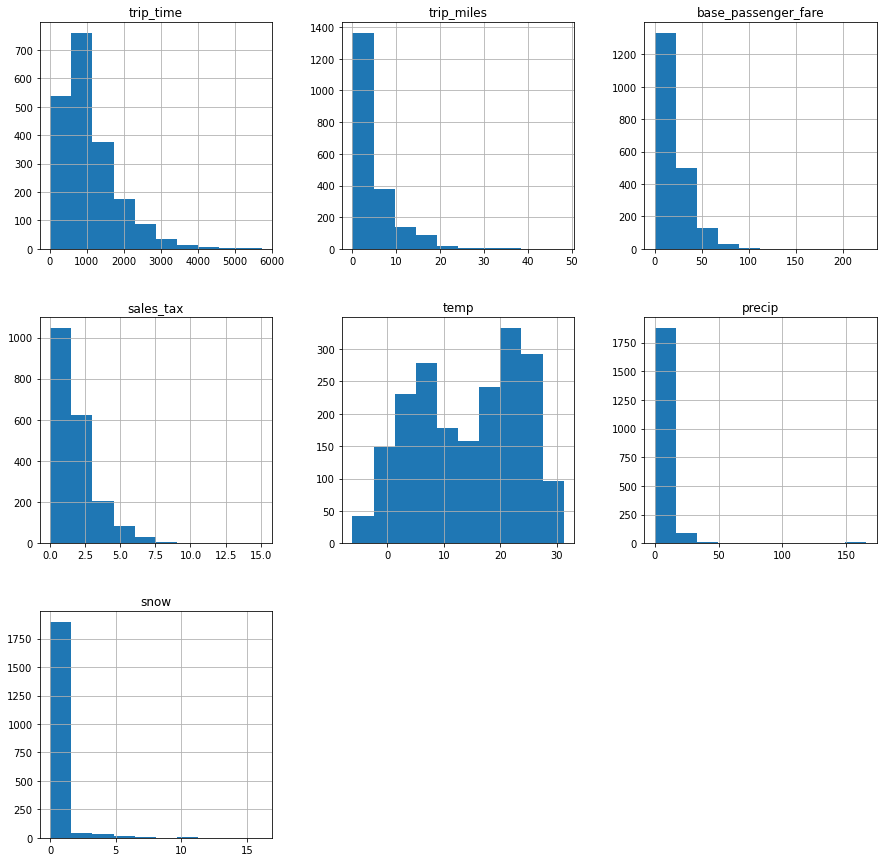

In [ ]:
# histogram: check numerical columns distribution
eda_data.hist(figsize=(15, 15))

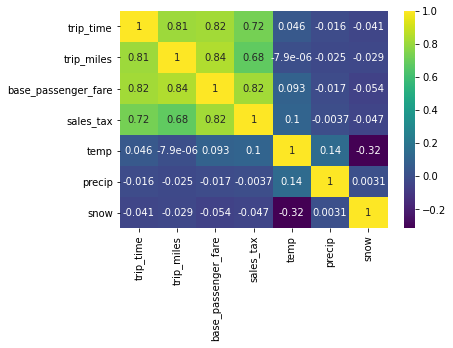

<Figure size 1440x1440 with 0 Axes>

In [ ]:
# check numercial columns correlation
sns.heatmap(eda_data.corr(), annot=True, cmap='viridis')
plt.figure(figsize = (20,20))
plt.show()

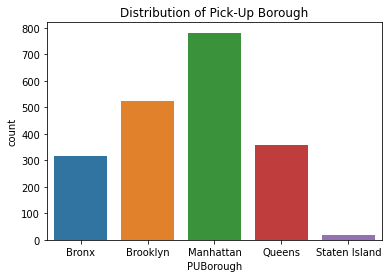

In [ ]:
# check categorical column distribution
sns.countplot(x='PUBorough', data=uber_final_data)

plt.title('Distribution of Pick-Up Borough')
plt.show()

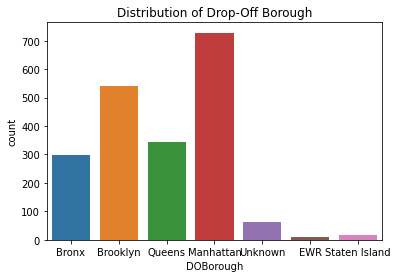

In [ ]:
# check categorical column distribution
sns.countplot(x='DOBorough', data=uber_final_data)

plt.title('Distribution of Drop-Off Borough')
plt.show()

In [ ]:
eda_uber = uber_final_data.copy()

In [ ]:
eda_uber['pickup_hour'] = eda_uber['pickup_datetime'].dt.hour
eda_uber['dropoff_hour'] = eda_uber['dropoff_datetime'].dt.hour

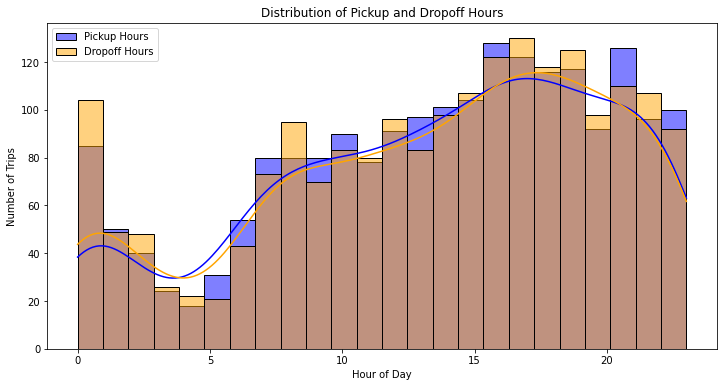

In [ ]:
# Plotting pickup hours
plt.figure(figsize=(12, 6))
sns.histplot(eda_uber['pickup_hour'], bins=24, kde=True, color='blue', label='Pickup Hours')

# Plotting dropoff hours
sns.histplot(eda_uber['dropoff_hour'], bins=24, kde=True, color='orange', label='Dropoff Hours')

# Add labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title('Distribution of Pickup and Dropoff Hours')
plt.legend()
plt.show()

## Model Analysis

In [2]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt


uber_data = pd.read_csv("uber_data")

format_string = "%Y-%m-%d %H:%M:%S"
for i in uber_data.index:
    uber_data['pickup_datetime'].iloc[i] = datetime.strptime(uber_data['pickup_datetime'].iloc[i], format_string).hour
    uber_data['dropoff_datetime'].iloc[i] = datetime.strptime(uber_data['dropoff_datetime'].iloc[i], format_string).hour
    if(uber_data['PUBorough'].iloc[i] == "Manhattan"):
        uber_data['PUBorough'].iloc[i] = 1
    elif (uber_data['PUBorough'].iloc[i] == "Brooklyn"):
        uber_data['PUBorough'].iloc[i] = 2
    elif (uber_data['PUBorough'].iloc[i] == "Bronx"):
        uber_data['PUBorough'].iloc[i] = 3
    elif (uber_data['PUBorough'].iloc[i] == "Queens"):
        uber_data['PUBorough'].iloc[i] = 4
    else: uber_data['PUBorough'].iloc[i] = 0

    if(uber_data['DOBorough'].iloc[i] == "Manhattan"):
        uber_data['DOBorough'].iloc[i] = 1
    elif (uber_data['DOBorough'].iloc[i] == "Brooklyn"):
        uber_data['DOBorough'].iloc[i] = 2
    elif (uber_data['DOBorough'].iloc[i] == "Bronx"):
        uber_data['DOBorough'].iloc[i] = 3
    elif (uber_data['DOBorough'].iloc[i] == "Queens"):
        uber_data['DOBorough'].iloc[i] = 4
    else: uber_data['DOBorough'].iloc[i] = 0

uber_data = uber_data[uber_data['PUBorough'] != "Unknown"]
df = pd.get_dummies(uber_data, columns=['PUBorough', 'DOBorough'], prefix=['PUBorough', 'DOBorough'])
df = df.drop(['PUBorough_0', 'DOBorough_0'], axis=1)

<ipython-input-2-0cf2731ec347>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['pickup_datetime'].iloc[i] = datetime.strptime(uber_data['pickup_datetime'].iloc[i], format_string).hour
<ipython-input-2-0cf2731ec347>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_data['dropoff_datetime'].iloc[i] = datetime.strptime(uber_data['dropoff_datetime'].iloc[i], format_string).hour
<ipython-input-2-0cf2731ec347>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

# 1 is the uncleaned data 2 is cleanned data with undersampling

In [3]:
train1, test1 = train_test_split(df, test_size = 0.3, random_state=42)
x_train1 = train1.drop(['tips'], axis=1)
y_train1 = train1[['tips']]
x_test1 = test1.drop(['tips'], axis=1)
y_test1 = test1[['tips']]

In [4]:
df['trip_time_trip_miles'] = df['trip_time']*df['trip_miles']
train2, test2 = train_test_split(df, test_size = 0.3, random_state=42)
x_train2 = train2.drop(['tips', 'dropoff_datetime', 'sales_tax'], axis=1)
y_train2 = train2[['tips']]
x_test2 = test2.drop(['tips', 'dropoff_datetime', 'sales_tax'], axis=1)
y_test2 = test2[['tips']]

In [5]:
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = undersampler.fit_resample(x_train2, y_train2)
train_resampled = pd.concat([x_resampled, y_resampled],axis=1)

In [6]:
x_test2

,pickup_datetime,trip_time,trip_miles,base_passenger_fare,PULocationID,DOLocationID,temp,precip,snow,PUBorough_1,PUBorough_2,PUBorough_3,PUBorough_4,DOBorough_1,DOBorough_2,DOBorough_3,DOBorough_4,trip_time_trip_miles
1860,10,482,0.61,11.49,230.0,163.0,29.3,0.44,0.0,1,0,0,0,1,0,0,0,294.02
353,19,283,0.90,7.51,153.0,220.0,7.9,0.00,0.0,1,0,0,0,0,0,1,0,254.70
1333,19,1802,6.99,28.75,188.0,261.0,15.3,1.63,0.0,0,1,0,0,1,0,0,0,12595.98
905,23,2705,21.13,68.97,148.0,265.0,23.3,11.13,0.0,1,0,0,0,0,0,0,0,57156.65
1289,18,576,0.65,14.67,229.0,162.0,15.0,0.00,0.0,1,0,0,0,1,0,0,0,374.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,20,1290,2.43,29.40,163.0,249.0,19.7,0.00,0.0,1,0,0,0,1,0,0,0,3134.70
1554,15,497,0.82,12.65,181.0,181.0,2.4,0.00,0.1,0,1,0,0,0,1,0,0,407.54
1956,22,304,0.91,5.75,79.0,107.0,21.2,0.00,0.0,1,0,0,0,1,0,0,0,276.64
925,21,301,1.31,7.91,61.0,72.0,-0.4,0.00,1.0,0,1,0,0,0,1,0,0,394.31


# Logistic Regression

with uncleaned data

In [90]:
model1_uncleaned = LogisticRegression(penalty=None)
model1_uncleaned.fit(x_train1, y_train1)
test_copy1_uncleaned = test1.copy()
test_copy1_uncleaned['lr_score'] = [i[1] for i in model1_uncleaned.predict_proba(x_test1)]
test_copy1_uncleaned.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,temp,...,snow,PUBorough_1,PUBorough_2,PUBorough_3,PUBorough_4,DOBorough_1,DOBorough_2,DOBorough_3,DOBorough_4,lr_score
1860,10,10,482,0.61,11.49,1.02,1,230.0,163.0,29.3,...,0.0,1,0,0,0,1,0,0,0,0.157193
353,19,19,283,0.90,7.51,0.67,0,153.0,220.0,7.9,...,0.0,1,0,0,0,0,0,1,0,0.121713
1333,19,20,1802,6.99,28.75,3.13,0,188.0,261.0,15.3,...,0.0,0,1,0,0,1,0,0,0,0.070999
905,23,0,2705,21.13,68.97,0.00,0,148.0,265.0,23.3,...,0.0,1,0,0,0,0,0,0,0,0.424838
1289,18,18,576,0.65,14.67,1.30,0,229.0,162.0,15.0,...,0.0,1,0,0,0,1,0,0,0,0.137174


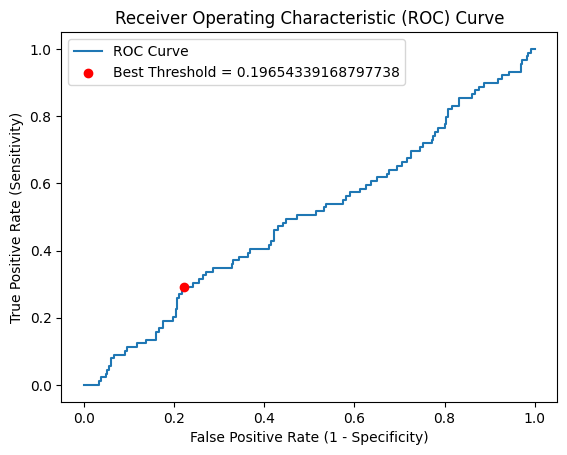

In [91]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test1, test_copy1_uncleaned['lr_score'])
plt.plot(fpr, tpr, label='ROC Curve')
index = tpr - fpr
best_threshold_index = np.argmax(index)
best_threshold_uncleaned = thresholds[best_threshold_index]

plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold_uncleaned}', zorder=5)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [93]:
y_true = test_copy1_uncleaned.tips
y_pred = (test_copy1_uncleaned.lr_score >= best_threshold_uncleaned).astype(int)

accuracy1 = accuracy_score(y_true, y_pred)
precision1 = precision_score(y_true, y_pred)
recall1 = recall_score(y_true, y_pred)
f11 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy1}')
print(f'Precision: {precision1}')
print(f'Recall: {recall1}')
print(f'F1-Score: {f11}')

Accuracy: 0.7066666666666667
Precision: 0.18705035971223022
Recall: 0.29213483146067415
F1-Score: 0.2280701754385965


     0    1
0  398  113
1   63   26


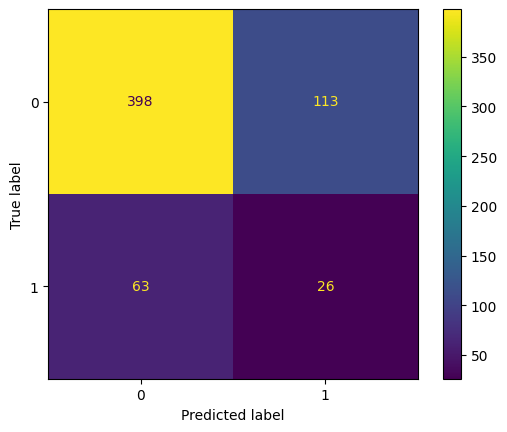

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(test_copy1_uncleaned.tips, test_copy1_uncleaned.lr_score>=best_threshold_uncleaned)))

cm_logistic_us = confusion_matrix(test_copy1_uncleaned.tips, test_copy1_uncleaned.lr_score>=best_threshold_uncleaned, labels=model1_uncleaned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model1_uncleaned.classes_)
disp.plot()
plt.show()

with cleaned data

In [12]:
model1_cleaned = LogisticRegression(penalty=None)
model1_cleaned.fit(x_resampled, y_resampled)

test_copy2 = test2.copy()
test_copy2['lr_score'] = [i[1] for i in model1_cleaned.predict_proba(x_test2)]
test_copy2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,temp,...,PUBorough_1,PUBorough_2,PUBorough_3,PUBorough_4,DOBorough_1,DOBorough_2,DOBorough_3,DOBorough_4,trip_time_trip_miles,lr_score
1860,10,10,482,0.61,11.49,1.02,1,230.0,163.0,29.3,...,1,0,0,0,1,0,0,0,294.02,0.471257
353,19,19,283,0.90,7.51,0.67,0,153.0,220.0,7.9,...,1,0,0,0,0,0,1,0,254.70,0.523435
1333,19,20,1802,6.99,28.75,3.13,0,188.0,261.0,15.3,...,0,1,0,0,1,0,0,0,12595.98,0.500049
905,23,0,2705,21.13,68.97,0.00,0,148.0,265.0,23.3,...,1,0,0,0,0,0,0,0,57156.65,0.530525
1289,18,18,576,0.65,14.67,1.30,0,229.0,162.0,15.0,...,1,0,0,0,1,0,0,0,374.40,0.509875


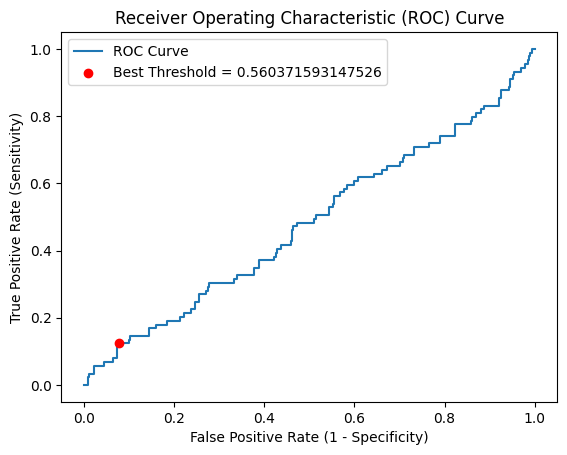

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test2, test_copy2['lr_score'])
plt.plot(fpr, tpr, label='ROC Curve')
index = tpr - fpr
best_threshold_index = np.argmax(index)
best_threshold_cleaned = thresholds[best_threshold_index]

plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold_cleaned}', zorder=5)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [15]:
y_true_lr = test_copy2.tips
y_pred_lr = (test_copy2.lr_score >= best_threshold_cleaned).astype(int)

lr_accuracy = accuracy_score(y_true_lr, y_pred_lr)
lr_precision = precision_score(y_true_lr, y_pred_lr)
lr_recall = recall_score(y_true_lr, y_pred_lr)
lr_f1 = f1_score(y_true_lr, y_pred_lr)

print(f'Accuracy: {lr_accuracy}')
print(f'Precision: {lr_precision}')
print(f'Recall: {lr_recall}')
print(f'F1-Score: {lr_f1}')

Accuracy: 0.8033333333333333
Precision: 0.21568627450980393
Recall: 0.12359550561797752
F1-Score: 0.15714285714285714


     0   1
0  471  40
1   78  11


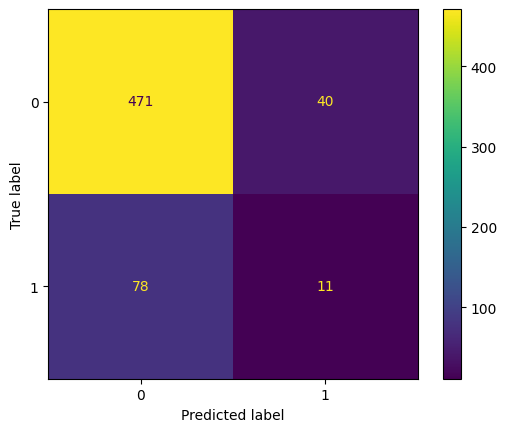

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(test_copy2.tips, test_copy2.lr_score>=best_threshold_cleaned)))

cm_logistic_us = confusion_matrix(test_copy2.tips, test_copy2.lr_score>=best_threshold_cleaned, labels=model1_cleaned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model1_cleaned.classes_)
disp.plot()
plt.show()

# Random Forest

with uncleaned data

In [95]:
from sklearn.ensemble import RandomForestClassifier
model2_uncleaned = RandomForestClassifier(random_state=42)
model2_uncleaned.fit(x_train1, y_train1)
test_copy1 = test1.copy()
test_copy1['rf_score'] = [i[1] for i in model2_uncleaned.predict_proba(x_test1)]
test_copy1.head()

<ipython-input-95-081136f44d04>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2_uncleaned.fit(x_train1, y_train1)


,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,temp,...,snow,PUBorough_1,PUBorough_2,PUBorough_3,PUBorough_4,DOBorough_1,DOBorough_2,DOBorough_3,DOBorough_4,rf_score
1860,10,10,482,0.61,11.49,1.02,1,230.0,163.0,29.3,...,0.0,1,0,0,0,1,0,0,0,0.31
353,19,19,283,0.90,7.51,0.67,0,153.0,220.0,7.9,...,0.0,1,0,0,0,0,0,1,0,0.05
1333,19,20,1802,6.99,28.75,3.13,0,188.0,261.0,15.3,...,0.0,0,1,0,0,1,0,0,0,0.18
905,23,0,2705,21.13,68.97,0.00,0,148.0,265.0,23.3,...,0.0,1,0,0,0,0,0,0,0,0.33
1289,18,18,576,0.65,14.67,1.30,0,229.0,162.0,15.0,...,0.0,1,0,0,0,1,0,0,0,0.38


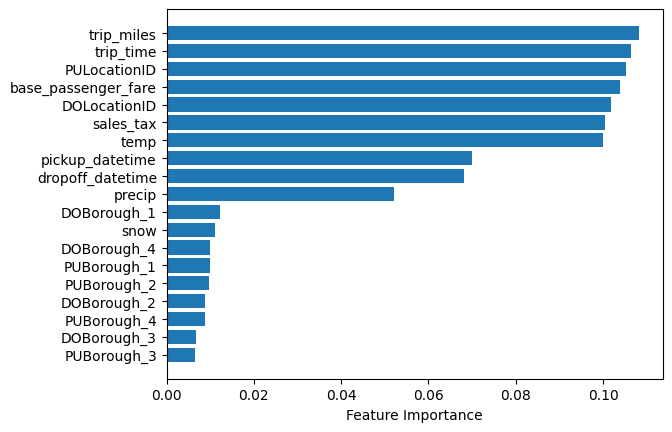

In [96]:
feature_importance = model2_uncleaned.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(feature_importance)

# Plotting
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), x_test1.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

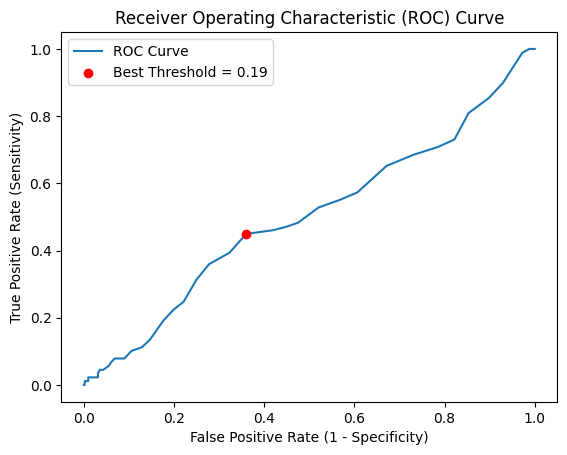

In [97]:
fpr, tpr, thresholds = roc_curve(y_test1, test_copy1['rf_score'])
plt.plot(fpr, tpr, label='ROC Curve')
index = tpr - fpr
best_threshold_index = np.argmax(index)
best_threshold_uncleaned = thresholds[best_threshold_index]

plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold_uncleaned}', zorder=5)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [99]:
y_true_rf = test_copy1.tips
y_pred_rf = (test_copy1.rf_score >= best_threshold_uncleaned).astype(int)

accuracy2 = accuracy_score(y_true_rf, y_pred_rf)
precision2 = precision_score(y_true_rf, y_pred_rf)
recall2 = recall_score(y_true_rf, y_pred_rf)
f12 = f1_score(y_true_rf, y_pred_rf)

print(f'Accuracy: {accuracy2}')
print(f'Precision: {precision2}')
print(f'Recall: {recall2}')
print(f'F1-Score: {f12}')

Accuracy: 0.6116666666666667
Precision: 0.17857142857142858
Recall: 0.449438202247191
F1-Score: 0.25559105431309903


     0    1
0  327  184
1   49   40


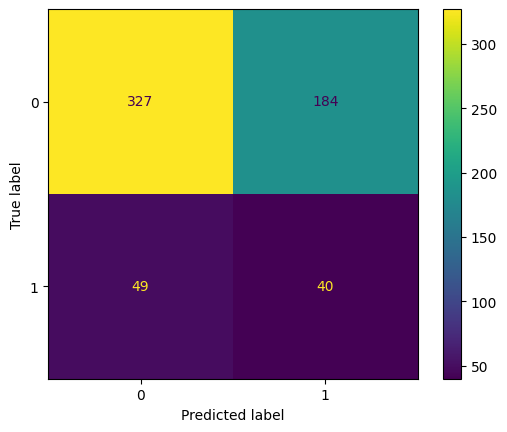

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(test_copy1.tips, test_copy1.rf_score>=best_threshold_uncleaned)))

cm_logistic_us = confusion_matrix(test_copy1.tips, test_copy1.rf_score>=best_threshold_uncleaned, labels=model2_uncleaned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model2_uncleaned.classes_)
disp.plot()
plt.show()

with cleaned data

In [33]:
model2_cleaned = RandomForestClassifier(random_state=42)
model2_cleaned.fit(x_resampled, y_resampled)
test_copy2['rf_score'] = [i[1] for i in model2_cleaned.predict_proba(x_test2)]
test_copy2.head()

<ipython-input-33-a5c883dfce70>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2_cleaned.fit(x_resampled, y_resampled)


,pickup_datetime,dropoff_datetime,trip_time,trip_miles,base_passenger_fare,sales_tax,tips,PULocationID,DOLocationID,temp,...,PUBorough_2,PUBorough_3,PUBorough_4,DOBorough_1,DOBorough_2,DOBorough_3,DOBorough_4,trip_time_trip_miles,lr_score,rf_score
1860,10,10,482,0.61,11.49,1.02,1,230.0,163.0,29.3,...,0,0,0,1,0,0,0,294.02,0.471257,0.73
353,19,19,283,0.90,7.51,0.67,0,153.0,220.0,7.9,...,0,0,0,0,0,1,0,254.70,0.523435,0.60
1333,19,20,1802,6.99,28.75,3.13,0,188.0,261.0,15.3,...,1,0,0,1,0,0,0,12595.98,0.500049,0.57
905,23,0,2705,21.13,68.97,0.00,0,148.0,265.0,23.3,...,0,0,0,0,0,0,0,57156.65,0.530525,0.41
1289,18,18,576,0.65,14.67,1.30,0,229.0,162.0,15.0,...,0,0,0,1,0,0,0,374.40,0.509875,0.84


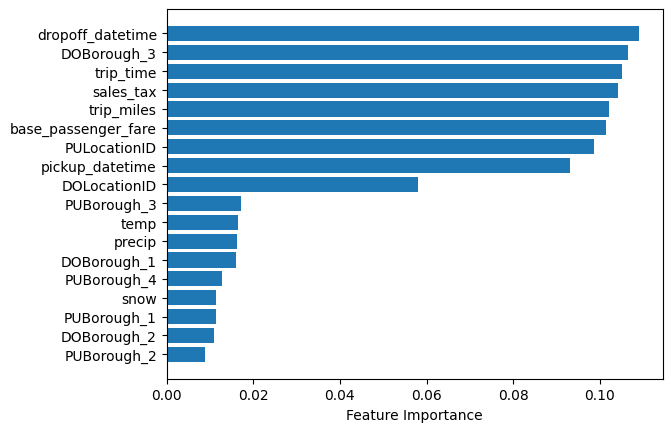

In [34]:
feature_importance = model2_cleaned.feature_importances_

# Sort the features by importance
sorted_idx = np.argsort(feature_importance)

# Plotting
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), x_test1.columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.show()

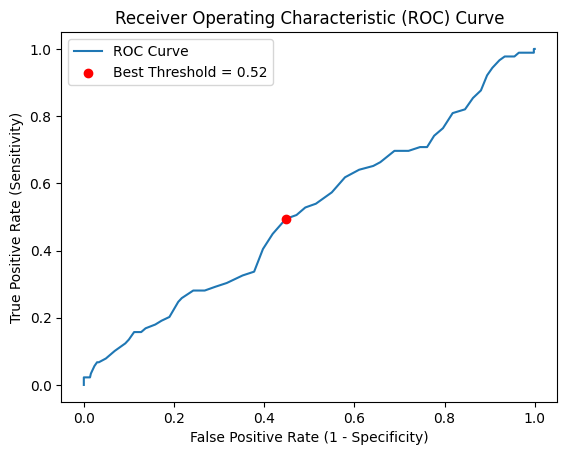

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test2, test_copy2['rf_score'])
plt.plot(fpr, tpr, label='ROC Curve')
index = tpr - fpr
best_threshold_index = np.argmax(index)
best_threshold_cleaned = thresholds[best_threshold_index]

plt.scatter(fpr[best_threshold_index], tpr[best_threshold_index], color='red', label=f'Best Threshold = {best_threshold_cleaned}', zorder=5)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [36]:
rf_accuracy = accuracy_score(test_copy2.tips, test_copy2.rf_score>=best_threshold_cleaned)
print(f'Accuracy: {rf_accuracy}')

Accuracy: 0.5433333333333333


In [37]:
y_true_rf = test_copy2.tips
y_pred_rf = (test_copy2.rf_score >= best_threshold_cleaned).astype(int)

rf_accuracy = accuracy_score(y_true_rf, y_pred_rf)
rf_precision = precision_score(y_true_rf, y_pred_rf)
rf_recall = recall_score(y_true_rf, y_pred_rf)
rf_f1 = f1_score(y_true_rf, y_pred_rf)

print(f'Accuracy: {rf_accuracy}')
print(f'Precision: {rf_precision}')
print(f'Recall: {rf_recall}')
print(f'F1-Score: {rf_f1}')

Accuracy: 0.5433333333333333
Precision: 0.16117216117216118
Recall: 0.4943820224719101
F1-Score: 0.2430939226519337


     0    1
0  282  229
1   45   44


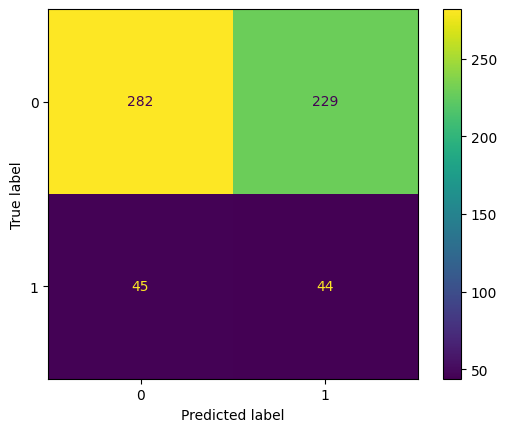

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(test_copy2.tips, test_copy2.rf_score>=best_threshold_cleaned)))

cm_logistic_us = confusion_matrix(test_copy2.tips, test_copy2.rf_score>=best_threshold_cleaned, labels=model2_cleaned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=model2_cleaned.classes_)
disp.plot()
plt.show()

# KNN

with uncleaned data

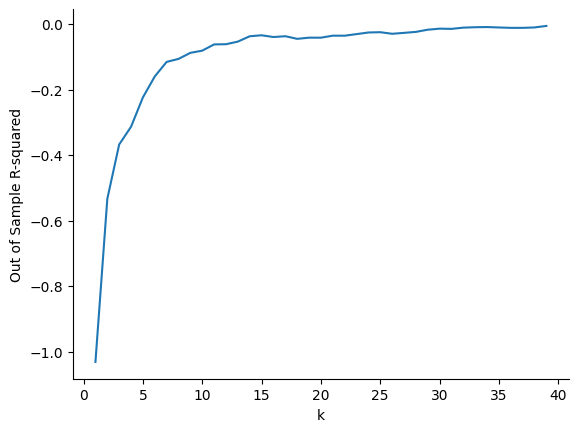

In [122]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors as sk_n
import sklearn.metrics as sk_m
score_list = []

for k in range(1, 40):
    knn = sk_n.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train1, y_train1)

    # Make predictions on the test set
    preds = knn.predict(x_test1)

    # Find the R-squared on the test set and append it to the
    # score list
    score_list.append(sk_m.r2_score(y_test1, preds))

plt.plot(range(1, 40), score_list)
plt.xlabel('k')
plt.ylabel('Out of Sample R-squared')
sns.despine()

In [123]:
knn_model = KNeighborsClassifier(n_neighbors=7)  # You can adjust the value of n_neighbors
knn_model.fit(x_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [124]:
y_true = y_test1
y_pred = knn_model.predict(x_test1)

accuracy3 = accuracy_score(y_true, y_pred)
precision3 = precision_score(y_true, y_pred)
recall3 = recall_score(y_true, y_pred)
f13 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy3}')
print(f'Precision: {precision3}')
print(f'Recall: {recall3}')
print(f'F1-Score: {f13}')

Accuracy: 0.8433333333333334
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


     0  1
0  506  5
1   89  0


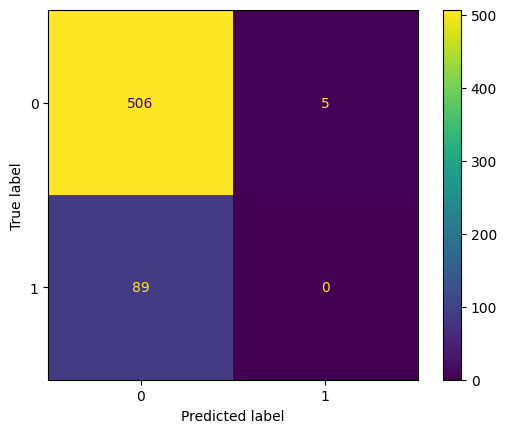

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(y_test1,y_pred)))

cm_logistic_us = confusion_matrix(y_test1, y_pred, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=knn_model.classes_)
disp.plot()
plt.show()

with cleaned data

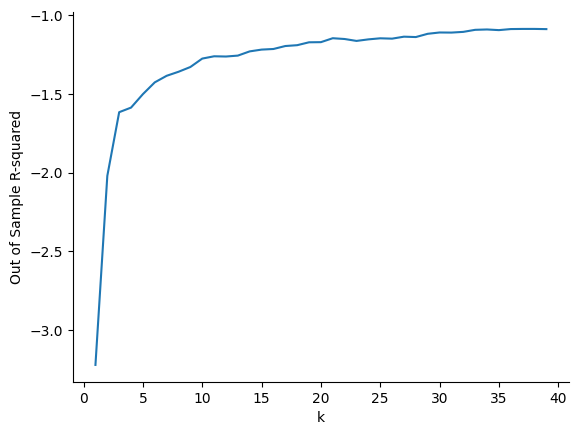

In [126]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.neighbors as sk_n
import sklearn.metrics as sk_m
score_list = []

for k in range(1, 40):
    knn = sk_n.KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_resampled, y_resampled)

    # Make predictions on the test set
    preds = knn.predict(x_test2)

    # Find the R-squared on the test set and append it to the
    # score list
    score_list.append(sk_m.r2_score(y_test2, preds))

plt.plot(range(1, 40), score_list)
plt.xlabel('k')
plt.ylabel('Out of Sample R-squared')
sns.despine()

In [127]:
knn_model = KNeighborsClassifier(n_neighbors=12)  # You can adjust the value of n_neighbors
knn_model.fit(x_resampled, y_resampled)
test_copy2['knn_score'] = [i[1] for i in knn_model.predict_proba(x_test2)]

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [128]:
y_true_knn = y_test2
y_pred_knn = knn_model.predict(x_test2)

knn_accuracy = accuracy_score(y_true_knn, y_pred_knn)
knn_precision = precision_score(y_true_knn, y_pred_knn)
knn_recall = recall_score(y_true_knn, y_pred_knn)
knn_f1 = f1_score(y_true_knn, y_pred_knn)

print(f'Accuracy: {knn_accuracy}')
print(f'Precision: {knn_precision}')
print(f'Recall: {knn_recall}')
print(f'F1-Score: {knn_f1}')

Accuracy: 0.525
Precision: 0.12015503875968993
Recall: 0.34831460674157305
F1-Score: 0.17867435158501443


     0    1
0  284  227
1   58   31


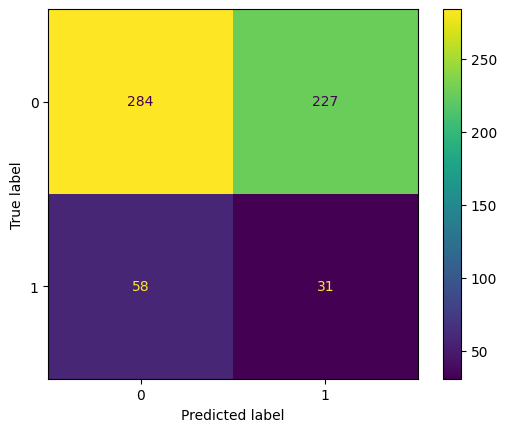

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(y_true_knn,y_pred_knn)))

cm_logistic_us = confusion_matrix(y_true_knn, y_pred_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=knn_model.classes_)
disp.plot()
plt.show()

# Decision Tree

with uncleaned data

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_depth':[3,None],
              'min_samples_leaf':randint(1,9),
              'criterion':['gini','entropy']}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
tree_cv.fit(x_train1,y_train1)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7843c0e988e0>})

In [132]:
y_true = y_test1
y_pred = tree_cv.predict(x_test1)

accuracy4 = accuracy_score(y_true, y_pred)
precision4 = precision_score(y_true, y_pred)
recall4 = recall_score(y_true, y_pred)
f14 = f1_score(y_true, y_pred)

print(f'Accuracy: {accuracy4}')
print(f'Precision: {precision4}')
print(f'Recall: {recall4}')
print(f'F1-Score: {f14}')

Accuracy: 0.8516666666666667
Precision: 0.0
Recall: 0.0
F1-Score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


     0  1
0  511  0
1   89  0


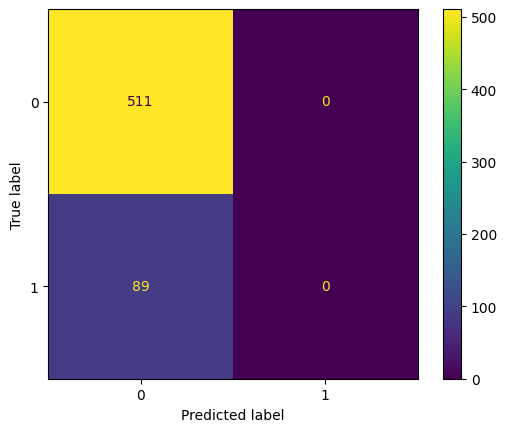

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(y_test1,y_pred)))

cm_logistic_us = confusion_matrix(y_test1, y_pred, labels=tree_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=tree_cv.classes_)
disp.plot()
plt.show()

with cleaned data

In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {'max_depth':[3,None],
              'min_samples_leaf':randint(1,9),
              'criterion':['gini','entropy']}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree,param_dist,cv=10)
tree_cv.fit(x_resampled,y_resampled)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7843ba98ab00>})

In [174]:
y_true_dt = y_test2
y_pred_dt = tree_cv.predict(x_test2)

dt_accuracy = accuracy_score(y_true_dt, y_pred_dt)
dt_precision = precision_score(y_true_dt, y_pred_dt)
dt_recall = recall_score(y_true_dt, y_pred_dt)
dt_f1 = f1_score(y_true_dt, y_pred_dt)

print(f'Accuracy: {dt_accuracy}')
print(f'Precision: {dt_precision}')
print(f'Recall: {dt_recall}')
print(f'F1-Score: {dt_f1}')

Accuracy: 0.48
Precision: 0.15479876160990713
Recall: 0.5617977528089888
F1-Score: 0.24271844660194175


     0    1
0  250  261
1   42   47


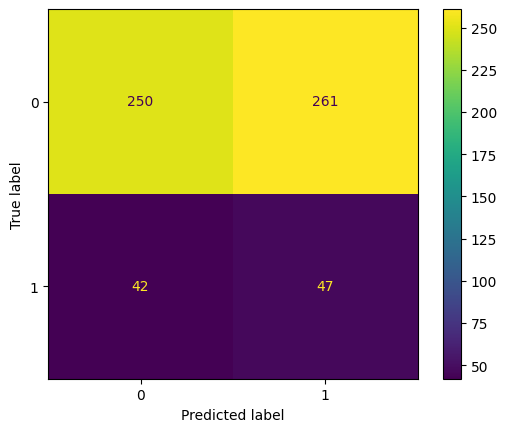

In [175]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(pd.DataFrame(confusion_matrix(y_test2,y_pred)))

cm_logistic_us = confusion_matrix(y_test2, y_pred, labels=tree_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logistic_us,display_labels=tree_cv.classes_)
disp.plot()
plt.show()

In [176]:
rf_prob = model2_cleaned.predict_proba(x_test2)[:, 1]
knn_prob = knn_model.predict_proba(x_test2)[:, 1]
lr_prob = model1_cleaned.predict_proba(x_test2)[:, 1]
dt_prob = tree_cv.predict_proba(x_test2)[:, 1]

In [177]:
rf_fpr, rf_tpr, _ = roc_curve(y_test2, rf_prob)
knn_fpr, knn_tpr, _ = roc_curve(y_test2, knn_prob)
lr_fpr, lr_tpr, _ = roc_curve(y_test2, lr_prob)
dt_fpr, dt_tpr, _ = roc_curve(y_test2, dt_prob)

In [178]:
rf_auc = metrics.auc(rf_fpr, rf_tpr)
knn_auc = metrics.auc(knn_fpr, knn_tpr)
lr_auc = metrics.auc(lr_fpr, lr_tpr)
dt_auc = metrics.auc(dt_fpr, dt_tpr)

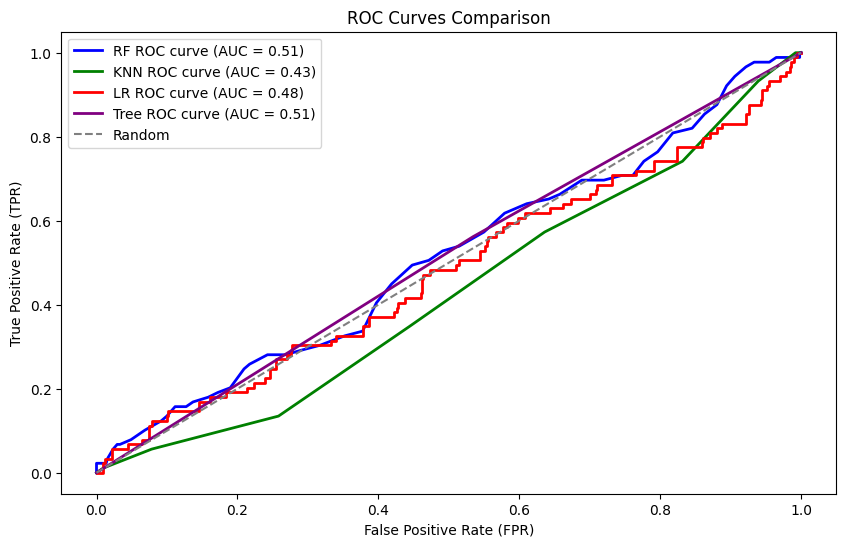

In [179]:

# Plot ROC curves
plt.figure(figsize=(10, 6))

# Random Forest
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'RF ROC curve (AUC = {rf_auc:.2f})')

# k-Nearest Neighbors
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN ROC curve (AUC = {knn_auc:.2f})')

# Logistic Regression
plt.plot(lr_fpr, lr_tpr, color='red', lw=2, label=f'LR ROC curve (AUC = {lr_auc:.2f})')

# Decision Tree
plt.plot(dt_fpr, dt_tpr, color='purple', lw=2, label=f'Tree ROC curve (AUC = {dt_auc:.2f})')

# Random line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves Comparison')
plt.legend()

# Show the plot
plt.show()

In [180]:
results_data_cleaned = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [lr_accuracy, rf_accuracy, knn_accuracy, dt_accuracy],
    'Precision': [lr_precision, rf_precision, knn_precision, dt_precision],
    'Recall': [lr_recall, rf_recall, knn_recall, dt_recall],
    'F1-Score': [lr_f1, rf_f1, knn_f1, dt_f1]
}

results_df_cleaned = pd.DataFrame(results_data_cleaned)

# Format the columns to three decimal places
results_df_cleaned = results_df_cleaned.round(3)

# Display the DataFrame
print(results_df_cleaned)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.803      0.216   0.124     0.157
1        Random Forest     0.543      0.161   0.494     0.243
2                  KNN     0.525      0.120   0.348     0.179
3        Decision Tree     0.480      0.155   0.562     0.243


In [182]:
results_data_uncleaned = {
    'Model': ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4],
    'Precision': [precision1, precision2, precision3, precision4],
    'Recall': [recall1, recall2, recall3, recall4],
    'F1-Score': [f11, f12, f13, f14]
}

results_df_uncleaned = pd.DataFrame(results_data_uncleaned)

# Format the columns to three decimal places
results_df_uncleaned = results_df_uncleaned.round(3)

# Display the DataFrame
print(results_df_uncleaned)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     0.707      0.187   0.292     0.228
1        Random Forest     0.612      0.179   0.449     0.256
2                  KNN     0.843      0.000   0.000     0.000
3        Decision Tree     0.852      0.000   0.000     0.000


<Axes: title={'center': 'Accuracy Comparison'}>

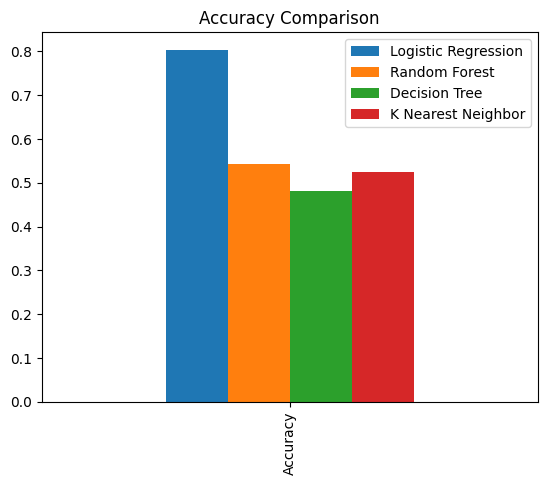

In [183]:
summary = pd.DataFrame(columns = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'K Nearest Neighbor'], index = ['Accuracy'])
summary[['Logistic Regression', 'Random Forest', 'Decision Tree', 'K Nearest Neighbor']] = [lr_accuracy, rf_accuracy, dt_accuracy, knn_accuracy]
summary.plot(kind = 'bar', title = 'Accuracy Comparison')